In [30]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Read the dataset**

In [31]:
df=pd.read_csv('/content/indianfoodedited375.csv')
df.sample(10)

,Food_ID,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
197,198,Bhatura,"Chole, rava, yogurt, plain flour, baking soda",vegetarian,20,20,spicy,main course,Punjab,North
112,113,dahi puri,"Puris crisp hollow shells, yogurt, tamarind ch...",vegetarian,20,10,tangy,snack,Maharashtra,West
83,84,Kajjikaya,"Rice flour, jaggery, coconut",vegetarian,40,15,sweet,dessert,Andhra Pradesh,South
37,38,Anarsa,"Rice flour, jaggery, khus-khus seeds",vegetarian,10,50,sweet,dessert,Maharashtra,West
224,225,Lauki ke kofte,"Bottle gourd, garam masala powder, gram flour,...",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
279,280,vegetarian Kolhapuri,"Gobi, potato, beans, khus khus, coconut",vegetarian,20,30,spicy,main course,Maharashtra,West
117,118,brinjal kosthu,"Brinjal eggplant, tamarind, spices, coconut",vegetarian,20,30,tangy,main course,Tamil Nadu,South
238,239,Paneer Bhurji,"Paneer, onions, tomatoes, spices",vegetarian,15,15,spicy,main course,Maharashtra,West
27,28,Laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,Rajasthan,North
270,271,Pav Bhaji,"Pav bhaji masala, gobi, potatoes, green peas, ...",vegetarian,20,40,spicy,main course,Maharashtra,West


In [32]:
df.describe()

,Food_ID,prep_time,cook_time
count,453.000000,453.000000,453.000000
mean,226.955850,38.114790,34.028698
std,130.844442,77.210207,36.710558
min,1.000000,5.000000,1.000000
25%,114.000000,10.000000,20.000000
50%,227.000000,15.000000,30.000000
75%,340.000000,25.000000,40.000000
max,453.000000,500.000000,720.000000


In [33]:
df['state'].unique()

array(['West Bengal', 'Odisha', 'Jammu & Kashmir', 'Delhi', 'Rajasthan',
       'Punjab', 'Uttar Pradesh', 'Uttarakhand', 'Bihar', 'Maharashtra',
       'Gujarat', 'Goa', 'Andhra Pradesh', 'Karnataka', 'Telangana',
       'Kerala', 'Tamil Nadu', 'Assam', 'Manipur', 'Madhya Pradesh',
       'Kolkata', 'Haryana', 'maharashtra', 'Chhattisgarh', 'Tripura',
       'Nagaland', 'Kashmir', 'Meghalaya', 'Himachal Pradesh',
       'Jharkhand', 'Mizoram'], dtype=object)

In [34]:
df['region'].unique()

array(['East', 'North', 'West', 'South', 'North East', 'West ', ' South'],
      dtype=object)

In [35]:
df['flavor_profile'].unique()

array(['sweet', 'tangy', 'bitter', 'savory', 'spicy'], dtype=object)

In [36]:
df[df['state']== '-1']

,Food_ID,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region


**Data Cleaning and Imputing**

In [37]:
#Impute the missing values for State and Region

df.iloc[[7,94,109,115],[7,8]] = ['Delhi','North']
df.iloc[[9,117],[7,8]] = ['Uttar Pradesh','North']
df.iloc[[10,96,145,149,154,158,164],[7,8]] = ['Andhra Pradesh', 'South']
df.iloc[[12,98],[7,8]] = ['Gujarat','West']
df.iloc[[111,128,130,144,156,161,162,231,248],[7,8]] = ['Tamil Nadu','South']

##Replace the nan for region
df["region"]=df["region"].fillna(df["region"].mode()[0])

##Replace "-1" for flavor_profile with 'unique' word
df['flavor_profile'].replace('-1', 'unique', regex = True, inplace = True)

##Replace prep_time and cook_time with respective median values
df['prep_time'].replace(-1, df['prep_time'].median(), regex = True, inplace = True)
df['cook_time'].replace(-1, df['cook_time'].median(), regex = True, inplace = True)

**Basic EDA & Visualizations**

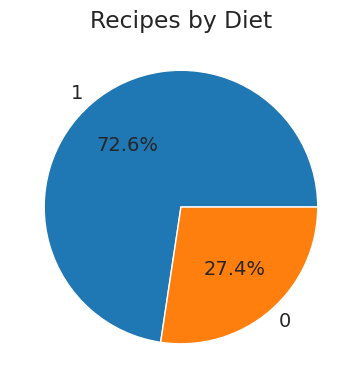

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each diet type
df_diet = df['diet'].value_counts().reset_index()

# Rename the columns to 'diet' and 'count'
df_diet.columns = ['diet', 'count']

# Convert the 'diet' column to categorical type and then to categorical codes
df_diet['diet'] = df_diet['diet'].astype('category').cat.codes

# Create subplots for the pie charts
plt.figure(figsize=(15,8))

# Plot the pie chart for recipes by diet
plt.subplot(1,3,1)
plt.pie(df_diet['count'], labels=df_diet['diet'], autopct='%1.1f%%')
plt.title("Recipes by Diet")

plt.show()


## **Recipe Embedding using BERT**

In [40]:
!pip install sentence_transformers

In [41]:
from sentence_transformers import SentenceTransformer
bert = SentenceTransformer('bert-base-nli-mean-tokens')

In [42]:
## Helper function to retrieve receipes

def get_index(recp):
    return df[df.name == recp].index.values[0]

def get_receipe(index):
    return df[df.index == index]["name"].values[0]

In [43]:
sentence_embeddings = bert.encode(df['ingredients']).tolist()

In [44]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(sentence_embeddings)

In [45]:
def getRecipeRecommentation(recipe_name):
    return sorted(list(enumerate(similarity[get_index(recipe_name)])), key = lambda x: x[1], reverse=True)

In [46]:
recommendations = getRecipeRecommentation('Kheer')
for x in range(10):
    print(get_receipe(recommendations[x][0]), sep = "\n")

Kheer
Doodhpak
semiya payasam
Paal Payasam
jouarisi payasam
Chak Hao Kheer
Bajri no rotlo
Phirni
aval payasam
Pitha


In [47]:
recommendations = getRecipeRecommentation('Dosa')
for x in range(10):
    print(get_receipe(recommendations[x][0]), sep = "\n")

Dosa
murukku
karasev
Anarsa
Ariselu
Pongal
Kajjikaya
Kombdi vade
Modak
Pithe


In [48]:
recommendations = getRecipeRecommentation('Tandoori Fish Tikka')
for x in range(10):
    print(get_receipe(recommendations[x][0]), sep = "\n")

Tandoori Fish Tikka
Khandvi
Khandvi
Gatta curry
Paneer tikka masala
Kadai paneer
Dhokla
Khaman
khichdi
dahi puri


In [50]:
# User input
ingredients = input("Enter ingredients separated by commas: ")
diet = input("Enter diet (e.g., vegetarian, non-vegetarian): ")
prep_time = int(input("Enter preparation time in minutes: "))
cook_time = int(input("Enter cooking time in minutes: "))

# Filter dataset based on user input
filtered_recipes = df[(df['ingredients'].str.contains(ingredients)) &
                      (df['diet'] == diet) &
                      (df['prep_time'] <= prep_time) &
                      (df['cook_time'] <= cook_time)]

# Output recommendations
if len(filtered_recipes) > 0:
    for index, recipe in filtered_recipes.iterrows():
        print("Name:", recipe['name'])
        print("Flavor Profile:", recipe['flavor_profile'])
        print("Course:", recipe['course'])
        print("State:", recipe['state'])
        print("Region:", recipe['region'])
        print("----------------------------------------")
else:
    print("No recipes found matching your criteria.")


Enter ingredients separated by commas: Gram flour, ghee, sugar
Enter diet (e.g., vegetarian, non-vegetarian): vegetarian
Enter preparation time in minutes: 80
Enter cooking time in minutes: 30
Name: Boondi
Flavor Profile: sweet
Course: dessert
State: Rajasthan
Region: West
----------------------------------------
